<a href="https://colab.research.google.com/github/flaaa31/Deep-Learning/blob/main/Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riconoscimento di fiori per un’azienda AgriTech
GreenTech Solutions Ltd., un'azienda all'avanguardia nel settore dell'agricoltura tecnologica, si trova ad affrontare la necessità critica di implementare un sistema avanzato di riconoscimento automatico dei fiori all'interno delle sue operazioni quotidiane. La necessità di identificare automaticamente i fiori è cruciale per diversi motivi strategici e operativi:

1. **Ottimizzazione delle Procedure Agricole:** Il riconoscimento automatico dei fiori consente di automatizzare e accelerare processi chiave all'interno dell'agricoltura, come la valutazione della salute delle piante, la gestione dei raccolti e la programmazione delle attività di manutenzione.
2. **Monitoraggio della Salute Vegetale:** La capacità di identificare rapidamente e con precisione i fiori permette a GreenTech Solutions di monitorare la salute delle colture in tempo reale, individuando precocemente eventuali segnali di stress vegetativo, malattie o carenze nutrienti.
3. **Decisioni Basate sui Dati:** Il riconoscimento automatico dei fiori fornisce dati dettagliati e affidabili che supportano decisioni agronomiche informate, come l'ottimizzazione dei trattamenti fitosanitari, la gestione dell'irrigazione e l'allocazione delle risorse agricole.
4. **Efficienza Operativa e Riduzione dei Costi:** Automatizzare il processo di identificazione dei fiori riduce la dipendenza da risorse umane per attività ripetitive e migliorabili, consentendo a GreenTech Solutions di allocare le risorse in modo più efficiente e di ridurre i costi operativi complessivi.
**Benefici del Progetto:** L'implementazione di un modello avanzato di Computer Vision per il riconoscimento automatico dei fiori porterà numerosi vantaggi tangibili:

* **Aumento della Produttività:** Riduzione dei tempi dedicati all'identificazione manuale dei fiori, liberando risorse per attività più strategiche e ad alto valore aggiunto.
* **Miglioramento della Qualità:** Garanzia di una classificazione più precisa e uniforme dei fiori, migliorando la qualità complessiva dei servizi e dei prodotti agricoli offerti.
* **Innovazione Tecnologica:** Dimostrazione di leadership nell'adozione di tecnologie all'avanguardia, posizionando GreenTech Solutions come pioniere nell'agricoltura digitale e sostenibile.
**Dettagli del Progetto:** GreenTech Solutions Ltd. ha avviato un'iniziativa strategica per sviluppare un prototipo di modello di Computer Vision basato su intelligenza artificiale per il riconoscimento automatico dei fiori. Il dataset fornito include due categorie principali di fiori:

* Daisy (Margherita): 529 immagini di train, 163 di validation, 77 di test.
* Dandelion (Tarassaco): 746 immagini di train, 201 di validation, 105 di test.

**Obiettivo del Progetto:** Il principale obiettivo è sviluppare un modello altamente accurato e robusto, capace di classificare automaticamente i fiori con il miglior F1-score (macro) possibile sul dataset di test. L'uso di tecniche avanzate come il transfer learning e le data augmentations con la libreria timm di PyTorch è fortemente consigliato per ottimizzare le prestazioni del modello.

**Approccio Raccomandato:** Si richiede la configurazione e l'addestramento di una rete neurale profonda utilizzando PyTorch, con una documentazione dettagliata delle metodologie adottate e delle decisioni prese durante il processo di sviluppo. È essenziale valutare attentamente i vantaggi e le sfide del modello, inclusa la sua capacità di adattarsi a variazioni nelle condizioni ambientali e di produrre risultati coerenti e affidabili in scenari reali.

L'integrazione di questa soluzione innovativa permetterà a GreenTech Solutions Ltd. di consolidare ulteriormente la sua posizione nel mercato agricolo, offrendo soluzioni avanzate che migliorano l'efficienza operativa, promuovono la sostenibilità e soddisfano le crescenti esigenze dei clienti nel settore agricolo moderno.

**Dataset**

Link: https://proai-datasets.s3.eu-west-3.amazonaws.com/progetto-finale-flowes.tar.gz

# Dataset download and file extraction

In [ ]:
"""
# Visual Studio Code

import requests
import tarfile
import io

# Download TAR file
url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/progetto-finale-flowes.tar.gz"
response = requests.get(url)

# Open TAR file and extract contents
with tarfile.open(fileobj=io.BytesIO(response.content), mode='r:gz') as tar_ref:
    # Extract all files to current directory
    tar_ref.extractall()

print("Dowload and extraction of file executed!")

"""

C:\Users\F.Orizio\AppData\Local\Temp\ipykernel_17692\204844926.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar_ref.extractall()


File scaricato ed estratto con successo!


In [ ]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/progetto-finale-flowes.tar.gz --quiet

In [ ]:
! tar -xzf progetto-finale-flowes.tar.gz

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown 

# Import and dataset preparation

In [ ]:
! pip install timm --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.2 MB/s eta 0:00:00


In [ ]:
# Import

import timm
import random
import os
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as T
from timm import create_model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import math

In [ ]:
# Random seed for reproducibility
seed = 31

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [ ]:
# CUDA Availability check
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU CUDA disponibile:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA non disponibile, si utilizza la CPU.")


GPU CUDA disponibile: Tesla T4


In [ ]:
root_dir = './progetto-finale-flowes'

# Walk through the directory and remove any file that starts with ".", probably metadata residuals from macOS
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.startswith(".") :
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Removed: {file_path}")


Removed: ./progetto-finale-flowes/._.DS_Store
Removed: ./progetto-finale-flowes/._README.dataset.txt
Removed: ./progetto-finale-flowes/._train
Removed: ./progetto-finale-flowes/._valid
Removed: ./progetto-finale-flowes/.DS_Store
Removed: ./progetto-finale-flowes/._test
Removed: ./progetto-finale-flowes/._README.roboflow.txt
Removed: ./progetto-finale-flowes/train/._.DS_Store
Removed: ./progetto-finale-flowes/train/.DS_Store
Removed: ./progetto-finale-flowes/train/._dandelion
Removed: ./progetto-finale-flowes/train/._daisy
Removed: ./progetto-finale-flowes/train/daisy/._34076975155_1faeedec90_n_jpg.rf.662e0d9e616d1b700bb78645ba2bcbae.jpg
Removed: ./progetto-finale-flowes/train/daisy/._7199968650_72afc16d31_m_jpg.rf.4a453e9c9a44dff0b14030da97e86968.jpg
Removed: ./progetto-finale-flowes/train/daisy/._18901817451_43e2b45f6c_jpg.rf.3b7ea05210089a3e31fbf1f8a93c3af8.jpg
Removed: ./progetto-finale-flowes/train/daisy/._8938566373_d129e7af75_jpg.rf.c7b2f9b40fd9a2cd65b5a47121a13e89.jpg
Removed: .

In [ ]:
# trainset, valset and testset definition, inside of parent folder "progetto-finale-flowes"
trainset = torchvision.datasets.ImageFolder(
    root='./progetto-finale-flowes/train')

valset = torchvision.datasets.ImageFolder(
    root='./progetto-finale-flowes/valid'
)

testset = torchvision.datasets.ImageFolder(
    root='./progetto-finale-flowes/test'
)


In [ ]:
trainset[0][0].size # 512x512 images

(512, 512)

In [ ]:
# train, val and test set length
len(trainset), len(valset), len(testset)

(1275, 364, 182)

# EDA

In [ ]:
# Classes names, saved into variable "classes"
classes = trainset.classes
classes

['daisy', 'dandelion']

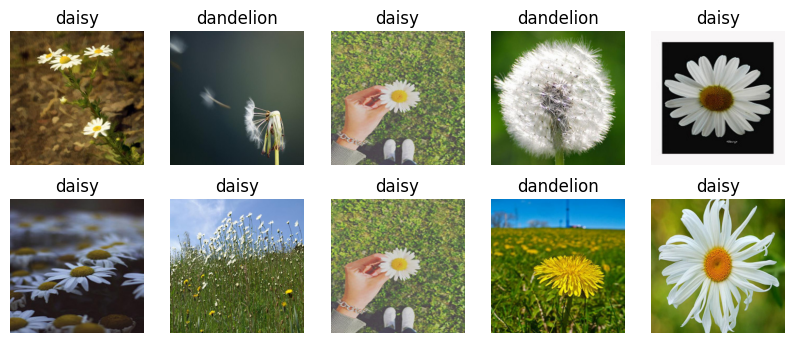

In [ ]:
# Print random images, to have an overview of dataset images
def print_random_images(dataset, num_rows, num_cols, class_names):
    num_images = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    for i in range(num_rows):
        for j in range(num_cols):
            index = random.randint(0, len(dataset) - 1)  # Random image selected
            image, label = dataset[index]
            axs[i, j].imshow(image)
            axs[i, j].set_title(class_names[label])  # show class name
            axs[i, j].axis('off')  # hide axis

    plt.show()


print_random_images(trainset, num_rows=2, num_cols=5, class_names=classes)  # Print 10 trainset random images, 2 lines and 5 columns

it seems that dandelion are more different from each other than daisies, let's see if it's true with some more random images...

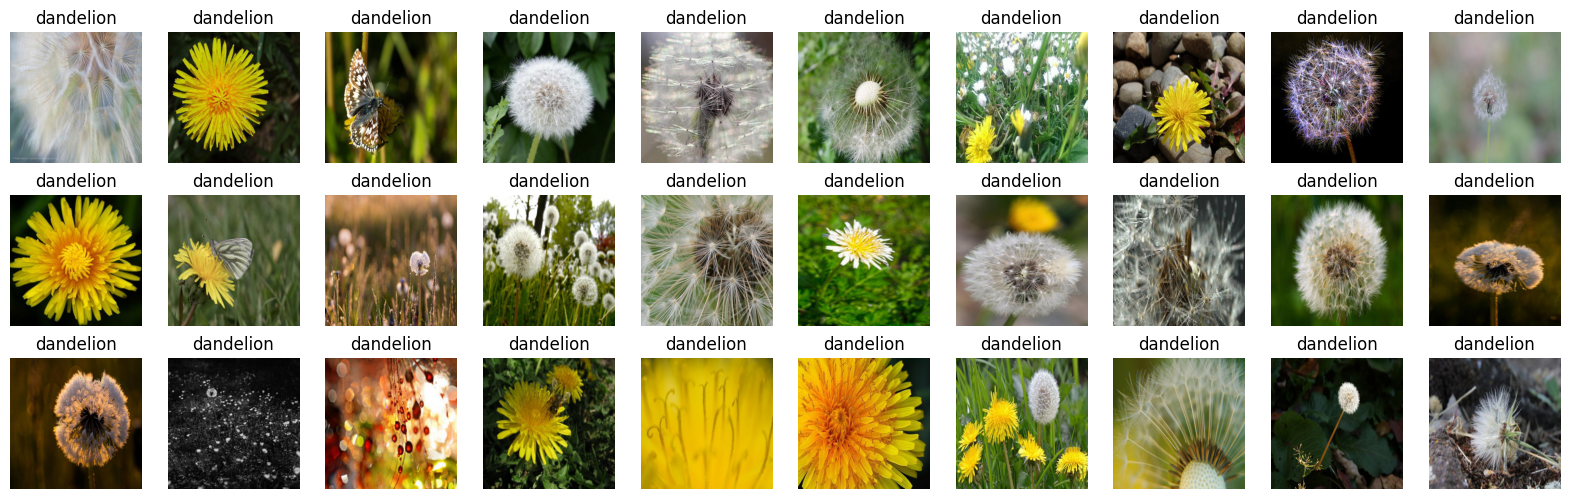

In [ ]:
def print_random_images_by_class(dataset, num_rows, num_cols, class_names, target_class):
    """

    Print random images from the dataset belonging to a specific class. The images are displayed in a grid of num_rows rows and num_cols columns.
    The class names are used to label the images.

    Parameters:
    - dataset: dataset that returns (image, label) tuples
    - num_rows: number of rows in the grid
    - num_cols: number of columns in the grid
    - class_names: list of class names
    - target_class: string of the name of the target class

    """
    num_images = num_rows * num_cols

    # Find index corresponding to the target class
    target_index = class_names.index(target_class)

    # Filter the indices for which the label matches the target class
    target_indices = [i for i in range(len(dataset)) if dataset[i][1] == target_index]

    if len(target_indices) < num_images:
        print(f"Non ci sono abbastanza immagini per la classe '{target_class}'. Ne ho trovate {len(target_indices)}.")
        num_images = len(target_indices)

    sampled_indices = random.sample(target_indices, num_images)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    # If axs is a two-dimensional array, flatten it to make it easier to iterate.
    axs = axs.flatten() if isinstance(axs, (list, np.ndarray)) and axs.ndim > 1 else [axs]

    for ax, idx in zip(axs, sampled_indices):
        image, label = dataset[idx]
        ax.imshow(image)
        ax.set_title(class_names[label])
        ax.axis('off')

    # Hide excess axis
    for ax in axs[len(sampled_indices):]:
        ax.axis('off')

    plt.show()

# Using with dandelions
print_random_images_by_class(trainset, num_rows=3, num_cols=10, class_names=classes, target_class="dandelion")


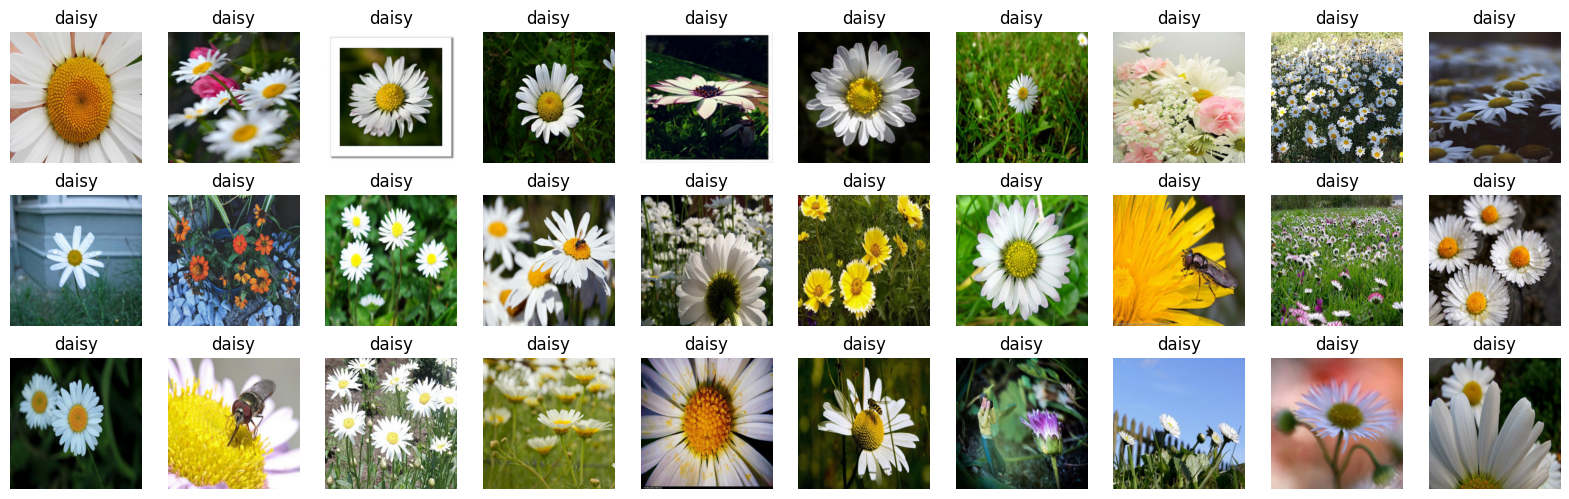

In [ ]:
# using with daisies
print_random_images_by_class(trainset, num_rows=3, num_cols=10, class_names=classes, target_class="daisy")

probably the model will make some mistakes with yellow dandelions, it seems that some of them are classified as daisies also...

In [ ]:
# Check if classes are balanced

# Main dataset directory
dataset_dir = './progetto-finale-flowes'

# train, val and test folders
splits = ['train', 'valid', 'test']

# count dictionary
class_distribution = {}

# Per tenere traccia delle classi in lista
all_classes = sorted(os.listdir(os.path.join(dataset_dir, 'train')))

# For every (train, val, test)
for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    class_distribution[split] = [0] * len(all_classes)  # counting list initialization

    # Check every class
    for idx, class_name in enumerate(all_classes):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            # Count file number
            num_files = len(os.listdir(class_dir))
            class_distribution[split][idx] = num_files

# Show results
for split, counts in class_distribution.items():
    print(f"\nClasses distribution in {split} dataset:")
    for idx, count in enumerate(counts):
        print(f"Class {all_classes[idx]}: {count}")


Classes distribution in train dataset:
Class daisy: 529
Class dandelion: 746

Classes distribution in valid dataset:
Class daisy: 163
Class dandelion: 201

Classes distribution in test dataset:
Class daisy: 77
Class dandelion: 105


not perfectly balanced but it's not that dramatic, no need to undersampling or oversampling one class or another, in my opinion

# Data Preparation and classes/functions definition

In [ ]:
# Confusion matrix
def plot_confusion_matrix(model, test_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = model(inputs)

            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
class ImageFolderDataset(Dataset):

    """
    A PyTorch Dataset for loading images from a folder structure.

    This dataset expects a directory structure where each split (e.g. 'train', 'val', 'test')
    contains subdirectories corresponding to each class. The images for each class should be stored
    in the respective subdirectory.

    Attributes:
        classes (list): List of class names.
        images (list): List of image file paths.
        targets (list): List of integer labels corresponding to each image.
        transform (callable): Optional transform to be applied on an image.
    """

    def __init__(
        self,
        root_dir,
        split: str = "train",
        transform: callable = None,
        classes: list = None
    ):

        """
        Initialize the ImageFolderDataset.

        Parameters:
            root_dir (str): Root directory containing the dataset.
            split (str): Subdirectory name corresponding to the dataset split (e.g. 'train', 'val').
            transform (callable): A function/transform that takes in a PIL image and returns a transformed version.
            classes (list): A list of class names. Must be provided.

        Raises:
            ValueError: If the classes list is not provided.
        """

        if classes is None:
            raise ValueError("No classes list found")
        self.classes = classes
        # class: index mapping
        label2target = {label: idx for idx, label in enumerate(self.classes)}

        split_dir = os.path.join(root_dir, split)
        self.images, self.targets = [], []
        for label in os.listdir(split_dir):
            label_dir = os.path.join(split_dir, label)
            # Existing label in classes list check
            if label not in label2target:
                continue
            images = [os.path.join(label_dir, f) for f in os.listdir(label_dir)]
            targets = [label2target[label]] * len(images)
            self.images.extend(images)
            self.targets.extend(targets)

        self.transform = transform

    def __getitem__(self, index: int) -> tuple:

        """
        Retrieve an image and its corresponding target based on the index.

        Parameters:
            index (int): Index of the desired image-target pair.

        Returns:
            tuple: (transformed image, target label)

        Raises:
            ValueError: If no transformation is provided to convert the image to a tensor.
        """

        image = Image.open(self.images[index])
        target = self.targets[index]
        if self.transform:
            image = self.transform(image)
        else:
            raise ValueError("Image must be converted to torch.Tensor.")
        return image, target

    def __len__(self) -> int:

        """
        Return the total number of images in the dataset.

        Returns:
            int: Total number of images.
        """

        return len(self.images)


In [ ]:
# Data Augmentation

train_transform = T.Compose([
    T.Resize((224, 224)), # for effnetb0
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(15),
    T.RandomApply([
          T.GaussianBlur(3, (0.5, 5))
        ], p=0.5),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # some backgrounds heavy disturb classification

    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # imagenet normalization
])

# light transformations on validation and test set
val_transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
# train_loader and val_loader creation

batch_size = 32

train_dataset = ImageFolderDataset(
    root_dir="./progetto-finale-flowes",
    split="train",
    transform=train_transform,
    classes = classes)

val_dataset = ImageFolderDataset(
    root_dir="./progetto-finale-flowes",
    split="valid",
    transform=val_transform,
    classes = classes)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Modelation: TL with timm


In [ ]:
model_name = "efficientnet_b0" # best one so far for performance/resources ratio

In [ ]:
model = timm.create_model(model_name, pretrained=True, num_classes=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
# model check with my dataset dimensions
x = torch.randn(2,3,224,224)
logits = model(x)
print(logits.shape)

torch.Size([2, 2])


In [ ]:
# standard criterion and optimizer, same as the ones seen in lessons
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [ ]:
num_epochs = 100
log_every_n_iter = 20

# Early stopping parameters
patience = 5
best_val_loss = float('inf')
trigger_times = 0

# Scheduler: Learning Rate reduction if val loss doesn't improve of a .1 factor
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1)

# trainig loop

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    print(f"Epoch: {epoch}")

    for i, batch in enumerate(train_loader, 0):
        x, targets = batch
        x = x.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        if (i+1) % log_every_n_iter == 0:
            print(f"> iter [{i+1}/{len(train_loader)}] - train_loss = {train_loss/log_every_n_iter:.4f}")
            train_loss = 0.0  # Loss reset

    # evaluation mode for valset
    model.eval()
    val_losses = []
    total, correct = 0, 0
    all_targets = []
    all_preds = []
    with torch.no_grad():
        for batch in val_loader:
            x, targets = [el.to(device) for el in batch]
            logits = model(x)
            loss = criterion(logits, targets)
            val_losses.append(loss.item())

            # Predictions
            _, preds = torch.max(logits, dim=1)
            total += targets.size(0)
            correct += (preds == targets).sum().item()

            # Targets and predictions for F1 score
            all_targets.extend(targets.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_val_loss = sum(val_losses) / len(val_losses)
    accuracy = correct / total
    f1_val = f1_score(all_targets, all_preds, average='macro')

    print("Validation report:")
    print(f"val loss = {avg_val_loss:.4f} - val accuracy = {accuracy:.4f} - val F1 score = {f1_val:.4f}")

    # Updating scheduler
    scheduler.step(avg_val_loss)

    # Early stopping: if val_loss doesn't improve, counter +=1
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        trigger_times = 0
        # Saving best model
        torch.save(model.state_dict(), f"{model_name}.pth")
        print(f"Modello migliorato: salvataggio checkpoint {model_name}.pth.")
    else:
        trigger_times += 1
        print(f"Trigger times: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("Early stopping triggered! Interruzione dell'allenamento.")
            break


    # Periodic saving of each 10 epochs
    if epoch % 10 == 0:
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_loss': avg_val_loss,
            'val_accuracy': accuracy,
            'val_f1': f1_val
        }
        torch.save(checkpoint, f'{model_name} checkpoint_epoch_{epoch}.pth')
        print(f"Checkpoint saved: {model_name} checkpoint_epoch_{epoch}.pth")


print("Finished Training")

Epoch: 0
> iter [20/40] - train_loss = 2.2589
> iter [40/40] - train_loss = 1.3003
Validation report:
val loss = 1.0793 - val accuracy = 0.7912 - val F1 score = 0.7903
Modello migliorato: salvataggio checkpoint efficientnet_b0.pth.
Checkpoint salvato: efficientnet_b0 checkpoint_epoch_0.pth
Epoch: 1
> iter [20/40] - train_loss = 0.8844
> iter [40/40] - train_loss = 0.8559
Validation report:
val loss = 0.8344 - val accuracy = 0.8297 - val F1 score = 0.8288
Modello migliorato: salvataggio checkpoint efficientnet_b0.pth.
Epoch: 2
> iter [20/40] - train_loss = 0.6524
> iter [40/40] - train_loss = 0.5834
Validation report:
val loss = 0.6539 - val accuracy = 0.8571 - val F1 score = 0.8552
Modello migliorato: salvataggio checkpoint efficientnet_b0.pth.
Epoch: 3
> iter [20/40] - train_loss = 0.5369
> iter [40/40] - train_loss = 0.4095
Validation report:
val loss = 0.5921 - val accuracy = 0.8654 - val F1 score = 0.8640
Modello migliorato: salvataggio checkpoint efficientnet_b0.pth.
Epoch: 4
> it

In [ ]:
# saving model as name_of_the_model.pt
torch.save(model.state_dict(), f"{model_name}.pt")

In [ ]:
# If we already trained the model and we loaded it
model = create_model("efficientnet_b0", pretrained=False, num_classes=2)
state_dict = torch.load("efficientnet_b0.pt")
model.load_state_dict(state_dict)
model.to(device)
model.eval();

<ipython-input-20-d2c1b388d268>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("efficientnet_b0.pt")


# Inference on test set

In [ ]:
test_dataset = ImageFolderDataset(
    root_dir="./progetto-finale-flowes",
    split="test",
    transform=val_transform,
    classes = classes)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
def evaluate_model(model, dataloader, criterion, device, report_name="Test Report"):
    """
    Evaluate the model on the given dataset and print the key performance metrics.

    The function sets the model to evaluation mode and processes the provided dataloader without computing gradients.
    It calculates the average loss, accuracy, and macro F1 score.

    Parameters:
        model (torch.nn.Module): The model to evaluate.
        dataloader (torch.utils.data.DataLoader): DataLoader containing the evaluation dataset.
        criterion (torch.nn.Module): The loss function used to compute the loss.
        device (str or torch.device): The device on which to run the model (e.g., "cuda" or "cpu").
        report_name (str): Title for the evaluation report (default is "Test Report").

    Returns:
        dict: A dictionary containing:
            - "loss": The average loss over the dataset.
            - "accuracy": The accuracy (correct predictions / total predictions).
            - "f1": The macro-averaged F1 score.
    """
    model.eval()  # Set the model to evaluation mode
    losses = []
    total, correct = 0, 0
    all_targets = []
    all_preds = []

    # Disable gradient computation for efficiency
    with torch.no_grad():
        for batch in dataloader:
            # Move the batch data to the specified device
            x, targets = [el.to(device) for el in batch]
            logits = model(x)
            loss = criterion(logits, targets)
            losses.append(loss.item())

            # Get predictions by selecting the index with the maximum logit value
            _, preds = torch.max(logits, dim=1)
            total += targets.size(0)
            correct += (preds == targets).sum().item()

            # Collect the targets and predictions for further metric calculations
            all_targets.extend(targets.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Calculate metrics
    avg_loss = sum(losses) / len(losses)
    accuracy = correct / total
    f1 = f1_score(all_targets, all_preds, average='macro')

    # Print the evaluation report
    print(report_name)
    print(f"Test Loss: {avg_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

    # Return the computed metrics as a dictionary
    return {"loss": avg_loss, "accuracy": accuracy, "f1": f1}


In [ ]:
test_metrics = evaluate_model(model, test_loader, criterion, device, report_name="Test Report")

Test Report
Test Loss: 0.3619
Test Accuracy: 0.9176
Test F1 Score: 0.9151


In [ ]:
def denormalize(img, mean, std):
    """
    De-normalizes a tensor image (C, H, W) into [0,1] range.
    """
    mean = torch.tensor(mean).view(-1, 1, 1).to(img.device)
    std = torch.tensor(std).view(-1, 1, 1).to(img.device)
    return img * std + mean

In [ ]:
def plot_random_images(model, dataset, device, classes, num_images=10,
                       mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """

    Visualizes a random sample of images from the dataset. The images are displayed with their predicted and true labels.

    Parameters:
    - model: PyTorch model in evaluation mode.
    - dataset: Dataset from which to take the images (must return (img, label)).
    - device: Device on which to run the model (e.g. "cuda" or "cpu").
    - classes: List of strings that maps the class index to the name.
    - num_images: Number of images to display (default=10).
    - mean, std: Parameters used for normalization (typical of ImageNet).
    """
    model.eval()  # evaluation mode
    indices = random.sample(range(len(dataset)), num_images)

    images, true_labels, pred_labels = [], [], []
    with torch.no_grad():
        for idx in indices:
            img, true_label = dataset[idx]
            # Adding batch dimension and move to "device" (cuda or cpu)
            input_img = img.unsqueeze(0).to(device)
            logits = model(input_img)
            _, pred = torch.max(logits, dim=1)
            images.append(img)
            true_labels.append(true_label)
            pred_labels.append(pred.item())

    # grid dimension in dinamuc way (squared layout)
    ncols = int(math.ceil(math.sqrt(num_images)))
    nrows = int(math.ceil(num_images / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
    # Check that axes is an array, even if there's only one image
    if num_images == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i in range(num_images):
        ax = axes[i]
        # De-normalization if image has 3 channels (RGB)
        if images[i].shape[0] == 3:
            img_denorm = denormalize(images[i], mean, std)
            img_to_show = img_denorm.permute(1, 2, 0).cpu().numpy()
        else:
            img_to_show = images[i].squeeze().cpu().numpy()

        # Values check between [0, 1]
        img_to_show = img_to_show.clip(0, 1)

        pred_str = classes[pred_labels[i]]
        true_str = classes[true_labels[i]]
        ax.imshow(img_to_show)
        ax.set_title(f"Pred: {pred_str}\nTrue: {true_str}")
        ax.axis('off')

    # Hides excess axis if subplot number is higher than num_images
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


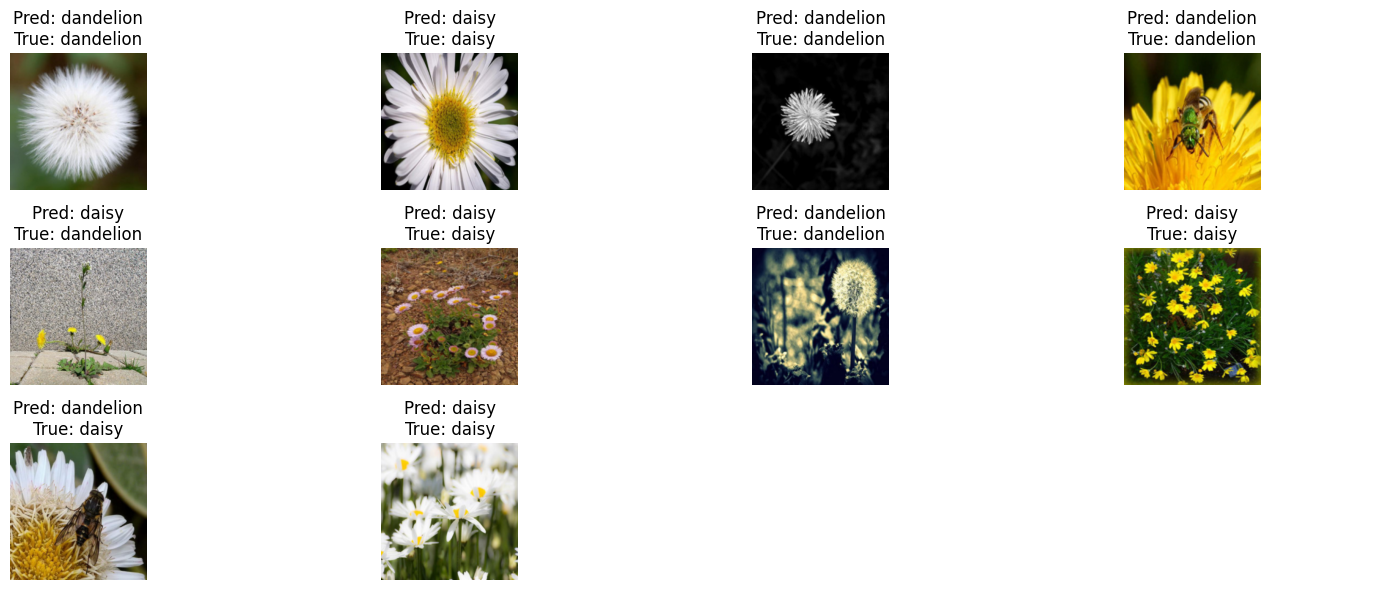

In [ ]:
# plot 10 random predicted test set images
plot_random_images(model, test_dataset, device, classes, 10)

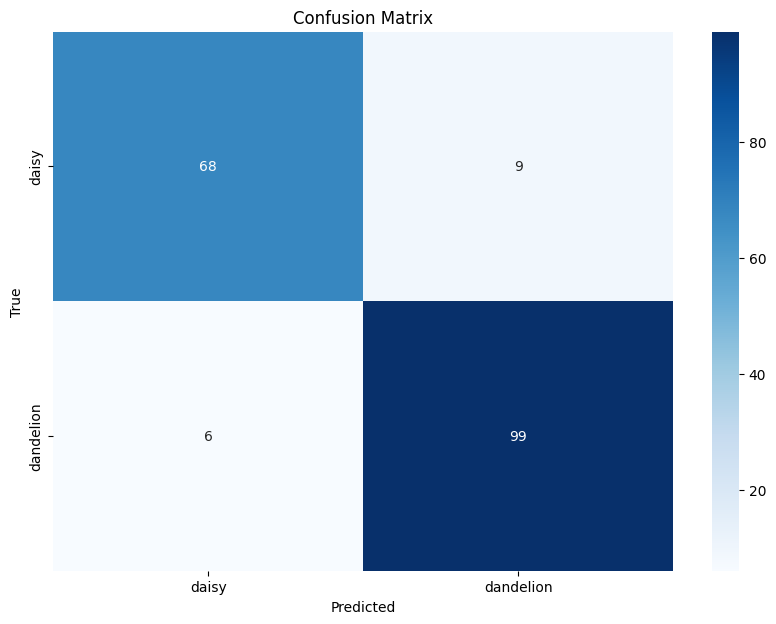

In [ ]:
#Confusion Matrix
plot_confusion_matrix(model, test_loader, device)

# Wrong images analysis

In [ ]:
def plot_wrong_images(model, dataset, device, classes, num_images=10,
                      mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """
    Display up to num_images images where the model's prediction was incorrect.
    The title of each image shows "Pred: <predicted_class>" and "True: <true_class>".

    Parameters:
    - model: the PyTorch model in evaluation mode.
    - dataset: the dataset to take the images from (must return (img, label)).
    - device: device to run the model on (e.g. "cuda" or "cpu").
    - classes: list of strings that maps the class index to the name.
    - num_images: maximum number of wrong images to display (default=10).
    - mean, std: parameters used for normalization (typical of ImageNet).
    """
    model.eval()  # evaluation mode
    wrong_images, true_labels, pred_labels = [], [], []

    with torch.no_grad():
        for idx in range(len(dataset)):
            img, true_label = dataset[idx]
            # Adding batch and move to device
            input_img = img.unsqueeze(0).to(device)
            logits = model(input_img)
            _, pred = torch.max(logits, dim=1)

            # Check if the prediction is wrong
            if pred.item() != true_label:
                wrong_images.append(img)
                true_labels.append(true_label)
                pred_labels.append(pred.item())

            # Stop when reaching num_images wrong predictions
            if len(wrong_images) >= num_images:
                break

    # Creating plot grid
    n_cols = 5
    n_rows = (len(wrong_images) + n_cols - 1) // n_cols  # Calculate number of rows needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
    axes = axes.flatten()

    for i in range(len(wrong_images)):
        # De-normalization if image has 3 channels (RGB)
        if wrong_images[i].shape[0] == 3:
            img_denorm = denormalize(wrong_images[i], mean, std)
            img_to_show = img_denorm.permute(1, 2, 0).cpu().numpy()
        else:
            img_to_show = wrong_images[i].squeeze().cpu().numpy()

        # Clipping if values out of range
        img_to_show = img_to_show.clip(0, 1)

        pred_str = classes[pred_labels[i]]
        true_str = classes[true_labels[i]]
        axes[i].imshow(img_to_show)
        axes[i].set_title(f"Pred: {pred_str}\nTrue: {true_str}")
        axes[i].axis('off')

    # Turn off unused axes if any
    for i in range(len(wrong_images), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


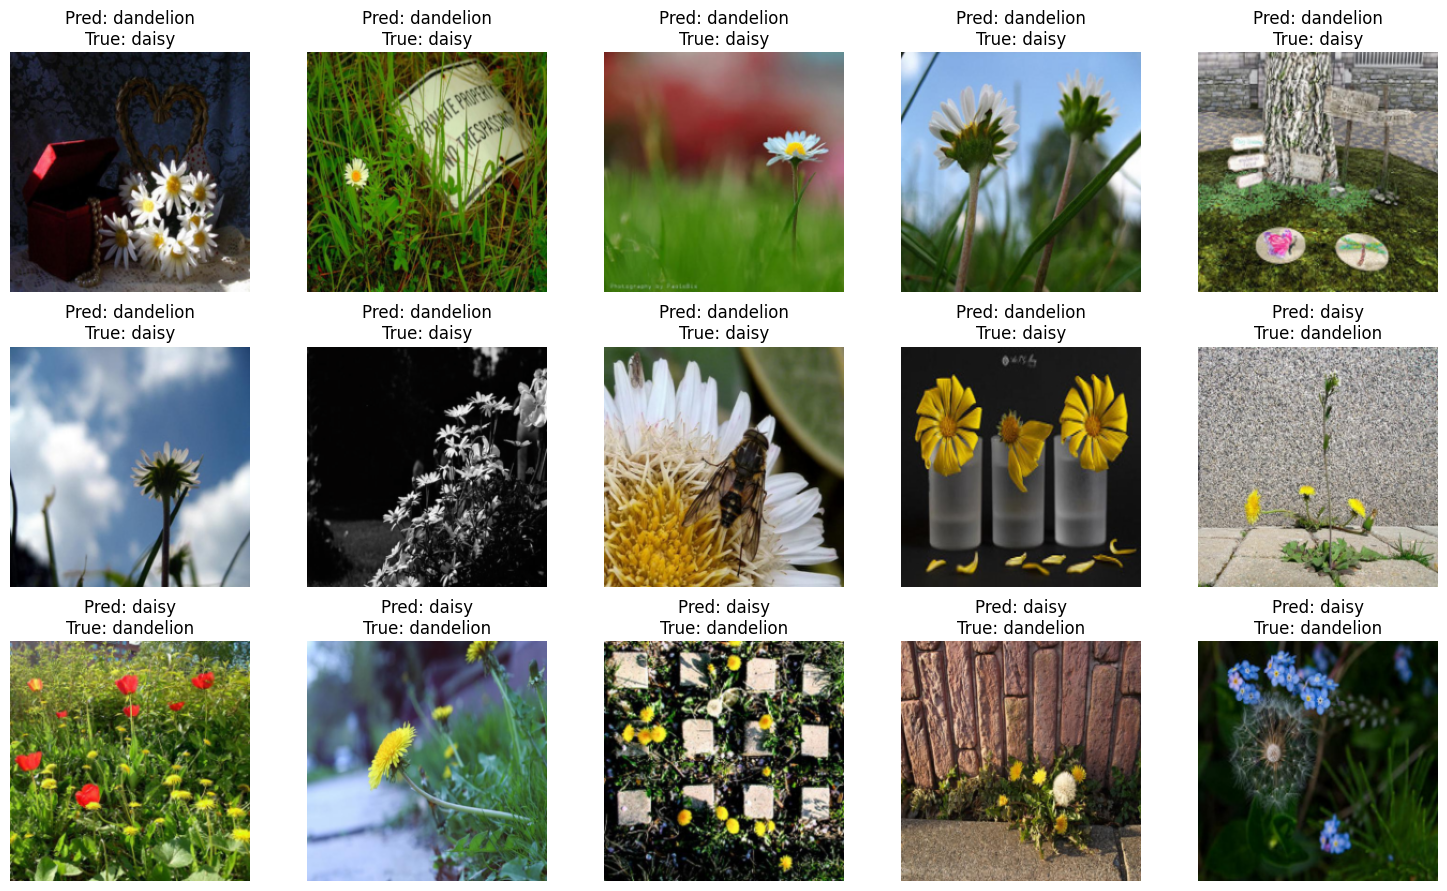

In [ ]:
# Model has 15 mistakes, so I'm gonna plot all of them
plot_wrong_images(model, test_dataset, device, classes, 15)

* some are really difficult images to predict, with multiple flowers in the same picture,
* some are, as expected, yellow dandelions

# Random unsplash images example

In [ ]:
new_images_dataset = ImageFolderDataset(
    root_dir="./progetto-finale-flowes",
    split="more_images",
    transform=val_transform,
    classes = classes)

new_images_loader = DataLoader(new_images_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
new_images_metrics = evaluate_model(model, new_images_loader, criterion, device, report_name="New Images Report")

New Images Report
Test Loss: 0.1026
Test Accuracy: 1.0000
Test F1 Score: 1.0000


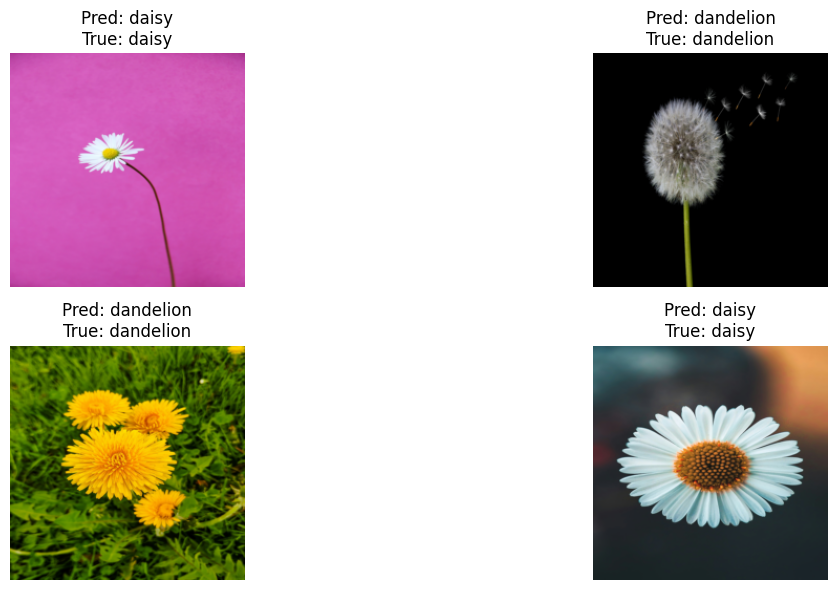

In [ ]:
plot_random_images(model, new_images_dataset, device, classes, 4)

# Conclusion
The model is already very good, to improve more I suggest a further division between white and yellow dandelions, in order to have better performance in yellow dandelions prediction.  
Moreover, we should check some daisies predicted as dandelions

# A big thanks to

 Artist: <a href="https://unsplash.com/it/@fidafe?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Fida Kettunen</a> photo: <a href="https://unsplash.com/it/foto/margherita-bianca-su-sfondo-rosa-f0wC10CPvAs?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
      
  Artist: <a href="https://unsplash.com/it/@aarngiri?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">AARN GIRI</a> photo: <a href="https://unsplash.com/it/foto/margherita-bianca-in-fiore-durante-il-giorno-3tYZjGSBwbk?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
      
  Artist: <a href="https://unsplash.com/it/@hg_photo?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Herbert Goetsch</a> photo: <a href="https://unsplash.com/it/foto/dente-di-leone-bianco-SGKQh9wNgAk?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

  Artist: <a href="https://unsplash.com/it/@walter46?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Walter Sturn</a> photo: <a href="https://unsplash.com/it/foto/quattro-fiori-dai-petali-gialli-kKmSRORgcnM?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  